# Importing the necessary libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dropout, MaxPool2D, Dense, Conv2D, Flatten, BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential

In [2]:
root = '../input/lgg-mri-segmentation/kaggle_3m'
 
def get_images_path():
    images = []
    labels = []
    for d in tqdm(os.listdir(root)):
        path = os.path.join(root, d)
        if os.path.isdir(path):
            iters = int(len(os.listdir(path))/2)
            for i in range(iters): 
                file = os.path.join(path, d) + '_' +str(i+1) + '.tif'
                mask = os.path.join(path, d) + '_' +str(i+1) + '_mask.tif'
                images.append(file)
                labels.append(mask)
    return images, labels

def read_images(paths, tipefile):
    images = []
    
    if tipefile == 'images':
        for f in tqdm(paths):
            img = read_image(f)
            images.append(img)    
    else:
        
        for f in tqdm(paths):
            img = read_mask(f)

            images.append(img)
    
    imgs1 = np.array(images)
    
    return imgs1
    
#  
def read_image(path):
    
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x,(128,128))
    x = x/255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x,(128,128))
    x = x/255.0
    x = x > 0.5
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=-1)
    return x


In [3]:
imgs, labels = get_images_path()
images = read_images(imgs, 'images')
masks = read_images(labels, 'masks')

100%|██████████| 3929/3929 [00:27<00:00, 144.40it/s]


In [4]:
images.shape

(3929, 128, 128, 3)

In [5]:
masks.shape

(3929, 128, 128, 1)

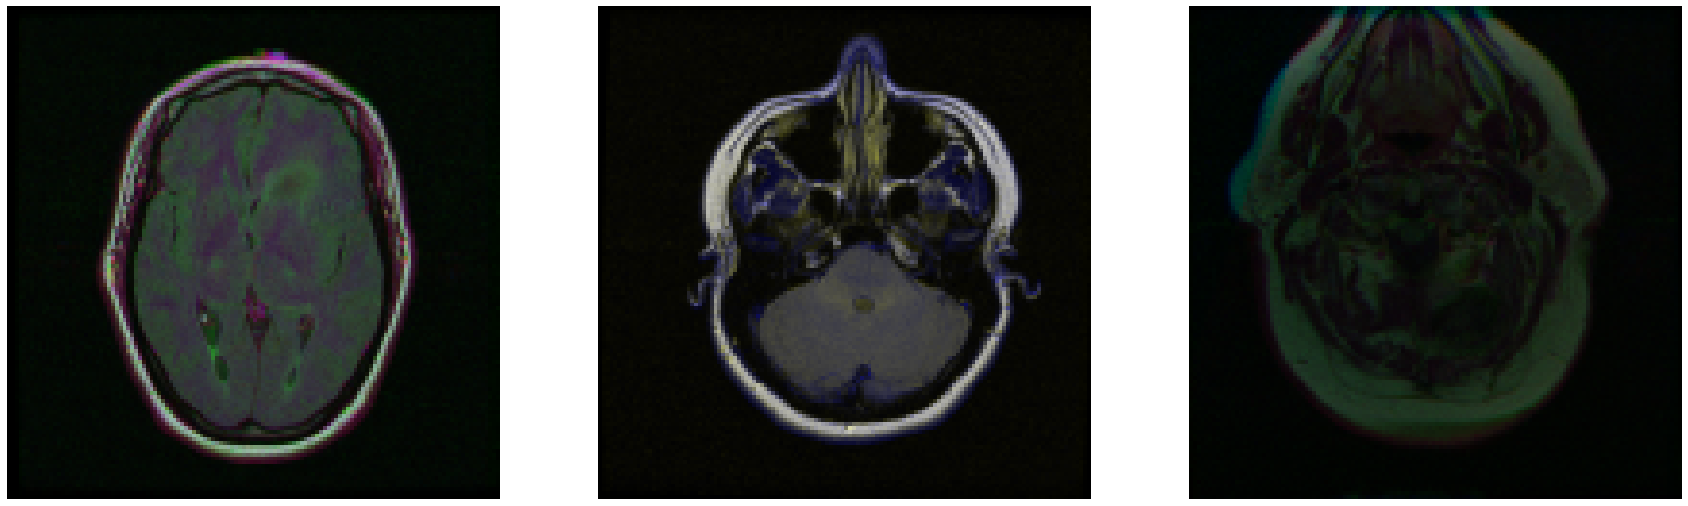

In [6]:
n = random.randint(0, len(images))
k = random.randint(0, len(images))
p = random.randint(0, len(images))

plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
plt.imshow(images[n])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(images[k])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(images[p])
plt.axis('off')

plt.show()

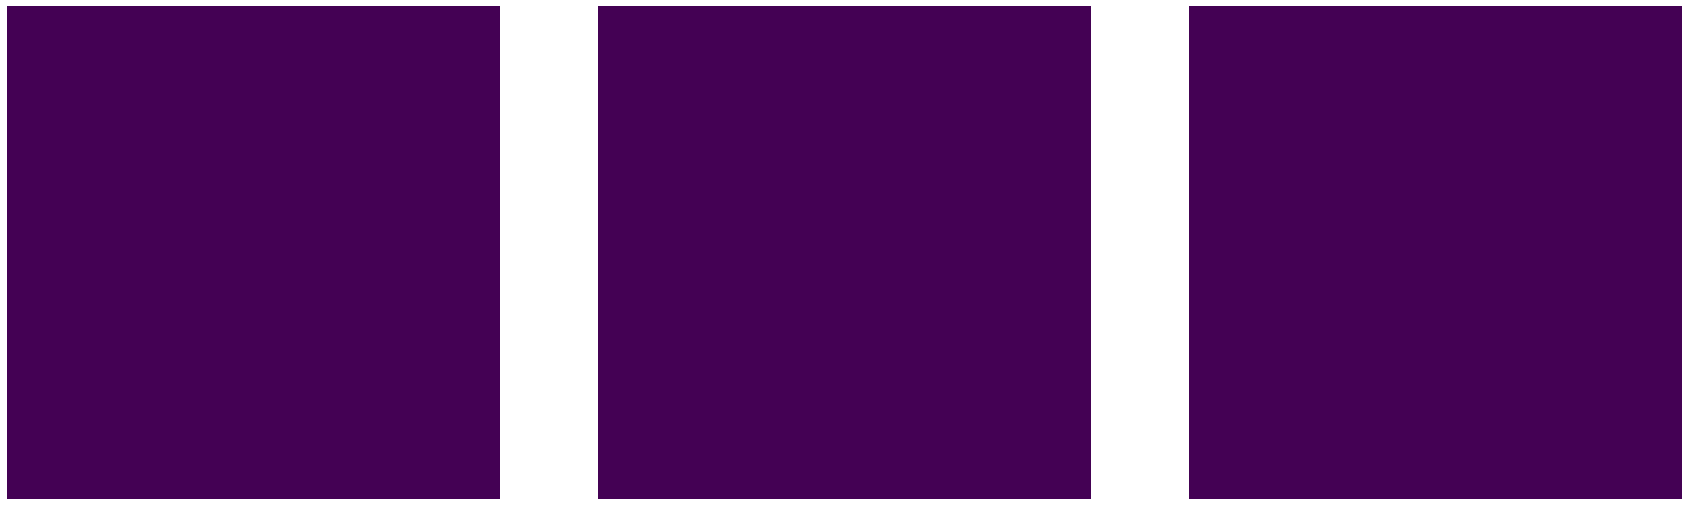

In [7]:
n = random.randint(0, len(masks))
k = random.randint(0, len(masks))
p = random.randint(0, len(masks))

plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
plt.imshow(masks[n])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masks[k])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(masks[p])
plt.axis('off')

plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, masks, test_size=.25, random_state = 288)

In [9]:
print(x_train.shape)
print(y_train.shape)

(2946, 128, 128, 3)
(2946, 128, 128, 1)


In [10]:
print(x_test.shape)
print(y_test.shape)

(983, 128, 128, 3)
(983, 128, 128, 1)


In [11]:
model=keras.Sequential([
      keras.layers.Dense(10,input_shape=((None, 128, 128, 3)),activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 128, 128, 10 40        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


2022-11-24 22:08:30.993487: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


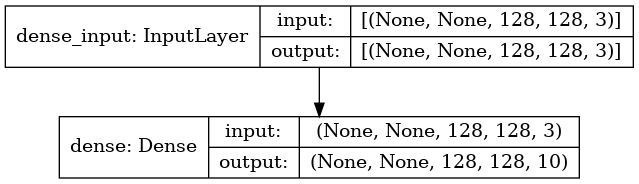

In [12]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [13]:
model.get_weights()[0]  #weights

array([[-0.6430092 ,  0.18472868, -0.1597367 ,  0.04560447, -0.5371512 ,
         0.20427197,  0.6431122 ,  0.50461733,  0.6011696 , -0.3903076 ],
       [-0.22640887, -0.09640533, -0.2984492 , -0.1589874 ,  0.64998066,
        -0.17502016, -0.31864357, -0.39733952, -0.53599894, -0.00279874],
       [-0.45983216,  0.33601916, -0.2647702 , -0.56054   ,  0.31441283,
         0.5125015 , -0.66363925, -0.07740426,  0.6682477 ,  0.18348509]],
      dtype=float32)

In [14]:
#Model training
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

2022-11-24 22:08:33.481172: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
93/93 [==============================] - 8s 82ms/step - loss: 2.3096 - accuracy: 0.5542
Epoch 2/5
93/93 [==============================] - 8s 82ms/step - loss: 2.1058 - accuracy: 0.7984
Epoch 3/5
93/93 [==============================] - 8s 81ms/step - loss: 1.9110 - accuracy: 0.9734
Epoch 4/5
93/93 [==============================] - 8s 85ms/step - loss: 1.7269 - accuracy: 0.9891
Epoch 5/5
93/93 [==============================] - 8s 82ms/step - loss: 1.5553 - accuracy: 0.9893


In [15]:
model.evaluate(x_test,y_test)

31/31 [==============================] - 2s 65ms/step - loss: 1.4701 - accuracy: 0.9895


[1.4701082706451416, 0.9895285964012146]

In [16]:
predicted=model.predict(x_test)
predicted[0]

array([[[0.6102903 , 0.39018387, 0.38959348, ..., 0.38966548,
         0.38975403, 0.389642  ],
        [0.6102903 , 0.39018387, 0.38959348, ..., 0.38966548,
         0.38975403, 0.389642  ],
        [0.6102903 , 0.39018387, 0.38959348, ..., 0.38966548,
         0.38975403, 0.389642  ],
        ...,
        [0.61049044, 0.38970503, 0.38890257, ..., 0.38888288,
         0.38884267, 0.3892271 ],
        [0.6102903 , 0.39018387, 0.38959348, ..., 0.38966548,
         0.38975403, 0.389642  ],
        [0.6102903 , 0.39018387, 0.38959348, ..., 0.38966548,
         0.38975403, 0.389642  ]],

       [[0.6102903 , 0.39018387, 0.38959348, ..., 0.38966548,
         0.38975403, 0.389642  ],
        [0.6102903 , 0.39018387, 0.38959348, ..., 0.38966548,
         0.38975403, 0.389642  ],
        [0.6102903 , 0.39018387, 0.38959348, ..., 0.38966548,
         0.38975403, 0.389642  ],
        ...,
        [0.61069053, 0.38922644, 0.3882121 , ..., 0.38810083,
         0.38793206, 0.3888123 ],
        [0.6

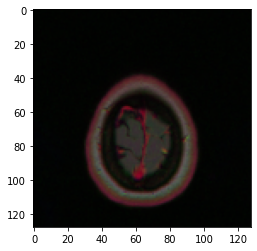

In [17]:
plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.show()

In [18]:
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras import models
from keras.models import Sequential

In [19]:
cnn=models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2,2),
   
    keras.layers.Conv2D(filters=64,kernel_size=(4,4),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    
    ])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3444800   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

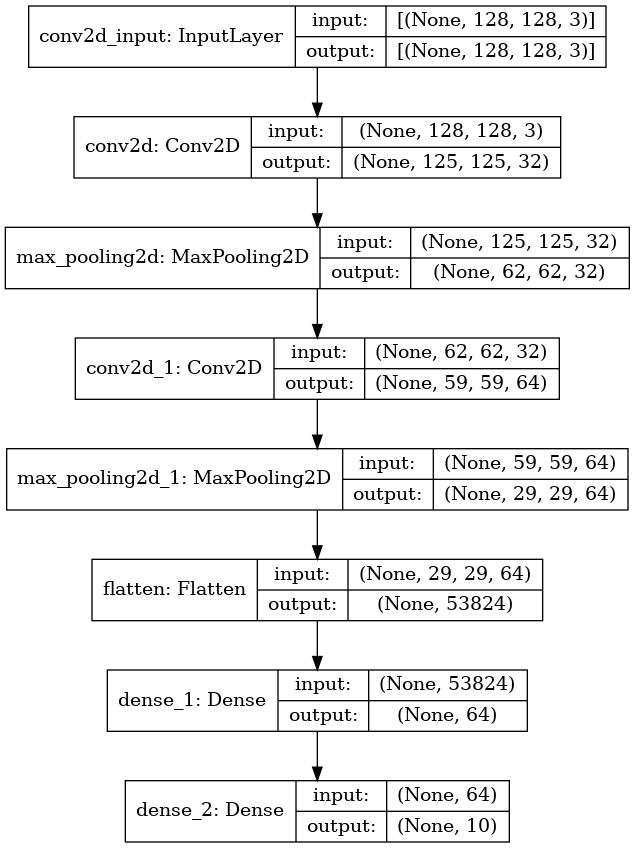

In [20]:
tf.keras.utils.plot_model(
    cnn,
    show_shapes=True,
    show_layer_names=True,
)

In [21]:
from keras.applications.mobilenet import MobileNet
import cv2

In [22]:
def resize_images(images,img_size):
    resized_images = []
    
    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img,(img_size),mode = 'constant'))
    
    return np.array(resized_images,dtype='float32')

In [23]:
mobilenet_img_size = (224,224,3)

print('Loading train data for MobileNet :')
mobile_train = resize_images(x_train,mobilenet_img_size)

print('Loading test data for MobileNet :')
mobile_test = resize_images(x_test,mobilenet_img_size)

Loading train data for MobileNet :


  0%|          | 0/2946 [00:00<?, ?it/s]


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


In [ ]:
base_model = MobileNet(include_top=False, weights='imagenet',input_shape = mobilenet_img_size, classes=10)
base_model.trainable = True 

for layer in base_model.layers[:50]:
    layer.trainable =  False

MobileNet_model = Sequential()
MobileNet_model.add(base_model)
MobileNet_model.add(Flatten())
MobileNet_model.add(Dense(10,activation=('softmax')))

early_stopping = EarlyStopping(min_delta = 0.001,patience = 20,restore_best_weights = True,verbose = 0)

# Compile
MobileNet_model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

# Train
Mobile = MobileNet_model.fit(mobile_train, mobile_train_labels, batch_size = 256, epochs = 50,callbacks = [early_stopping], validation_data = (mobile_val, mobile_val_labels))

In [ ]:
MobileNet_predictions = MobileNet_model.predict(mobile_test)
MobileNet_predictions = np.argmax(MobileNet_predictions,axis=1)

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=5)